# Assignment 2  Random Walk Metrics

**Name:** Milagros Contreras Elizalde 

**e-mail:** milagros.contreras8430@alumnos.udg.mx

# Modules


In [6]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from scipy.spatial import distance


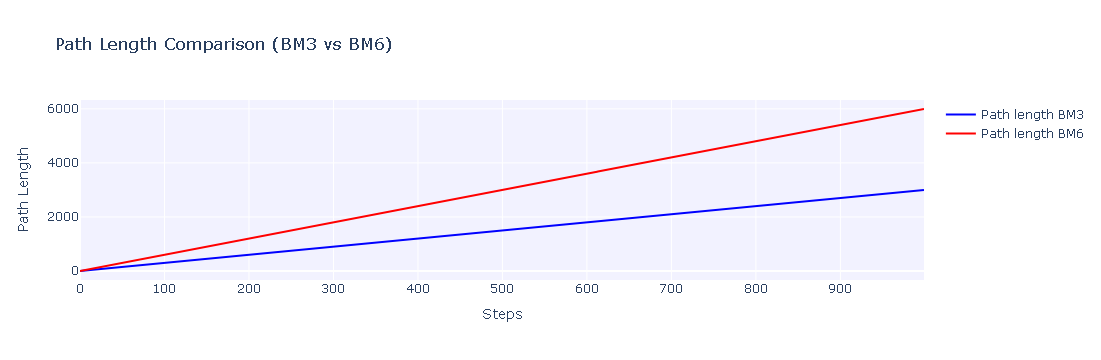

In [7]:

# Cargar los datos desde los CSV
brownian_3 = pd.read_csv(r'C:\Users\herik\Documents\Assignment 2_MCE\csv\brownian_3.csv')
brownian_6 = pd.read_csv(r'C:\Users\herik\Documents\Assignment 2_MCE\csv\brownian_6.csv')


# Función para calcular la longitud acumulada del camino
def calculate_accumulated_path_length(df):
    points = df[['x_pos', 'y_pos']].values
    accumulated_lengths = [0]
    for i in range(1, len(points)):
        accumulated_lengths.append(accumulated_lengths[-1] + distance.euclidean(points[i-1], points[i]))
    return accumulated_lengths

# Cálculo de las longitudes acumuladas de los caminos
BM_path_length_3 = calculate_accumulated_path_length(brownian_3)
BM_path_length_6 = calculate_accumulated_path_length(brownian_6)

# Creación de la figura usando plotly
fig = go.Figure()

# Añadir trayectorias desde los archivos CSV (longitud acumulada)
fig.add_trace(go.Scatter(
    x=list(range(len(BM_path_length_3))),
    y=BM_path_length_3,
    mode='lines',
    name='Path length BM3',
    line=dict(color='blue')
))

fig.add_trace(go.Scatter(
    x=list(range(len(BM_path_length_6))),
    y=BM_path_length_6,
    mode='lines',
    name='Path length BM6',
    line=dict(color='red')
))

# Configuración de la figura
fig.update_layout(
    title="Path Length Comparison (BM3 vs BM6)",
    xaxis_title="Steps",
    yaxis_title="Path Length",
    showlegend=True,
    plot_bgcolor='rgba(230, 230, 255, 0.5)'
)

# Mostrar la figura
fig.show()
